sources principales :

Regression Linéaire
Implementation of Multi-Variate Linear Regression in Python using Gradient Descent Optimization from scratch. Learn, Implement and Tune…
Navoneel Chakrabarty, Dec 26, 2018
https://towardsdatascience.com/implementation-of-multi-variate-linear-regression-in-python-using-gradient-descent-optimization-b02f386425b9
 

kNN
A Practical Introduction to K-Nearest Neighbors Algorithm for Regression (with Python code)
Aishwarya Singh, August 22, 2018
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/


Introduction to k-Nearest Neighbors: A powerful Machine Learning Algorithm(with implementation in Python & R)
Tavish Srivastava, March 26, 2018
https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

Categorical data
https://www.kaggle.com/getting-started/27270
http://www.datasciencemadesimple.com/convert-column-to-categorical-pandas-python-2/


# **Librairies**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import random as random

# **Mount Google Drive (for google colab users only !)**

Si vous utilisez Google Colab, 
Merci de copier les données dans le répertoire : 
My Drive/Colab Notebooks/Openclassroom/

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os

dir = "/content/drive/My Drive/Colab Notebooks/Openclassroom/"
os.chdir(dir)

!ls


Mounted at /content/drive/
 Activite1-Final.ipynb
'Activite1-Implementation of Multi-Variate Linear Regression.ipynb'
 activite1_OC.ipynb
 house_data.csv
 Untitled0.ipynb


# **Load data**

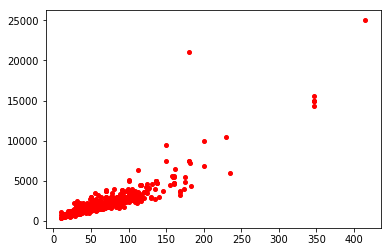

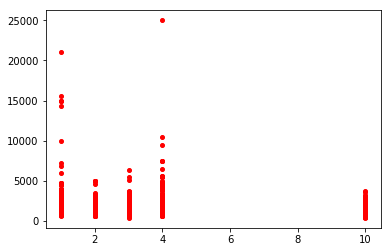

In [0]:
data = pd.read_csv('house_data.csv')
data = data.dropna()

# Drop the id column
features = data.drop(['price'], axis=1, inplace=None)
target = data[['price']]

# On affiche le nuage de points dont on dispose
plt.plot(data['surface'], data['price'], 'ro', markersize=4)
plt.show()
plt.plot(data['arrondissement'], data['price'], 'ro', markersize=4)
plt.show()

# **Features Scaling**

Not required as there is only one continuous feature

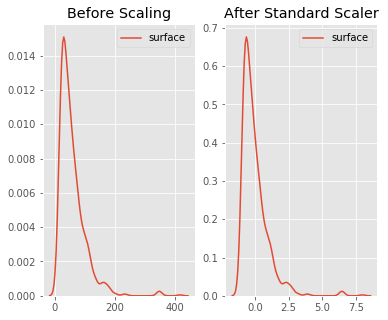

In [0]:
from sklearn import preprocessing
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')


# Not required as there is only one continuous feature
scaler = preprocessing.StandardScaler()
features[['surface']] = scaler.fit_transform(features[['surface']])
features[['surface']] = pd.DataFrame(features[['surface']])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['surface'], ax=ax1)
#sns.kdeplot(data['arrondissement'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(features.iloc[:,0], ax=ax2)
#sns.kdeplot(features.iloc[:,1], ax=ax2)
plt.show()

# **Deal with categorical variables**

In [0]:
features['arrondissement'] = pd.Categorical(features.arrondissement, ordered = False)
features = pd.get_dummies(features)

# **Split dataset into Train and Test**

In [0]:
from sklearn.model_selection import train_test_split

# Flatten labels matrices
target = target.values.flatten()

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)



# **Linear regression model**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_train)

# model evaluation
rmse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1594.16087921  273.46302165   45.99443839  -65.4320048    44.90487833
 -298.93033356]
Intercept: 2017.4207145550924
Root mean squared error:  657199.6624885366
R2 score:  0.798702707573848


# **Linear regression prediction on test data**

In [0]:
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Root mean squared error:  934311.459877061
R2 score:  0.8079818770685685


# K-Nearest Neighbors (regression)

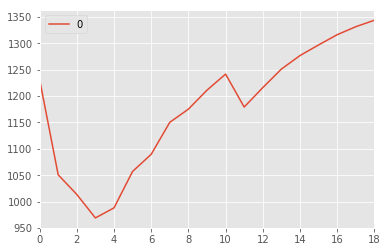

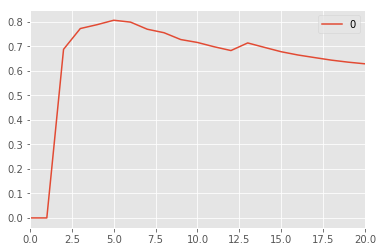

In [0]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(1,20)

rmse_val = [] #to store rmse values for different k
rvalue = np.empty(len(n) + 2)

for K in n:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    rvalue[K] = r2_score(y_test, pred)
    
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

curve = pd.DataFrame(rvalue) #elbow curve 
curve.plot()


# **Finding best K and recompute the model**

In [0]:
bestK = np.argmax(rvalue) 

model = neighbors.KNeighborsRegressor(n_neighbors = bestK)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
rvalue[K] = r2_score(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE value for k = ' , bestK , 'is:', error)
print('R2 score: ', r2)

RMSE value for k =  5 is: 969.312244278948
R2 score:  0.8069019261686137


# Implementing GridsearchCV 

In [0]:
from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

tuned_parameters = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                     'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, tuned_parameters, cv=5, iid = True)
model.fit(X_train, y_train)
model.best_params_

{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'uniform'}

# **K-Nearest Neighbors prediction on test dataset**

In [0]:
pred=model.predict(X_test) #make prediction on test set

error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
r2 = r2_score(y_test, pred)
print('RMSE value is:', error)
print('R2 score: ', r2)


RMSE value is: 1036.9125496830654
R2 score:  0.7790292418852608


# **Synthèse des résultats**

Un modèle de régréssion linaire multivarié a donné sur le dataset test, les performances suivantes : 

*   Root mean squared error:  320071.86427163944
*   R2 score:  0.9027638319029181


Un modèle de K-Nearest Neighbors intégrant une recherche automatique du meilleur k a donné sur le dataset test, les performances suivantes : 

*   Best k = 2
*   RMSE value for k =  2 is: 457.14570152659473
*   R2 score:  0.9365122965803249


Un modèle de K-Nearest Neighbors  complété par GridSearchCV (intégrant une cross-validation et une recherche automatique du meilleur k, du meilleur algorithme, de la meilleure pondération des features) a donné sur le dataset test, les performances suivantes : 

*   algorithm: brute, n_neighbors: 14, weights: distance
*   RMSE value is: 464.4542180579314
*   R2 score:  0.9344660781212517






# **Conclusion**

Une bonne prédiction des données est faites en kNN. Toutefois, même si dans ce cas le résultats est meilleur qu'en régression linéaire, il a été noté que dans certains cas, cette dernière pouvait avoir une meilleure performance. Une explication à cela est le faible nombre d'instance dans notre jeu de donnée.

Plusieurs méthodes d'optimisation de l'algorithme de base ont été proposées en intégrant la fonction gridsearchcv, qui donne des résultats similaires. Une autre méthode d'optimisation pourrait être d'intégrer une méthode d'Ensembling.